In [9]:
# Core Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Scikit-learn Libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# Statistical Libraries
from scipy.stats import multivariate_normal

# Utility Libraries
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


🔧 Generating synthetic anomaly detection dataset...
📊 Dataset shape      : (1000, 2)
🎯 Normal samples     : 900
⚠️ Anomalous samples  : 100
📈 Contamination rate : 10.00%


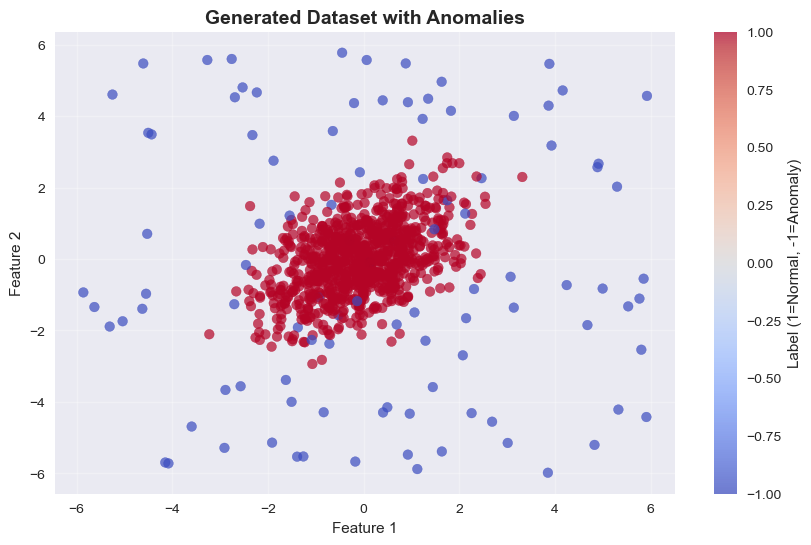

In [2]:
def generate_anomaly_data(n_samples=1000, contamination=0.1, random_state=42):
    """
    Generate synthetic dataset with anomalies for testing Isolation Forest
    
    Parameters:
    -----------
    n_samples : int, default=1000
        Number of total samples to generate
    contamination : float, default=0.1
        Proportion of anomalies in the dataset
    random_state : int, default=42
        Random state for reproducibility
        
    Returns:
    --------
    X : array-like, shape (n_samples, n_features)
        Generated features
    y : array-like, shape (n_samples,)
        True labels (1 for normal, -1 for anomaly)
    """
    np.random.seed(random_state)
    
    # Number of normal and anomalous samples
    n_normal = int(n_samples * (1 - contamination))
    n_anomalies = n_samples - n_normal
    
    # Generate normal data (multivariate normal distribution)
    normal_data = np.random.multivariate_normal(
        mean=[0, 0], 
        cov=[[1, 0.5], [0.5, 1]], 
        size=n_normal
    )
    
    # Generate anomalous data (outliers)
    anomaly_data = np.random.uniform(low=-6, high=6, size=(n_anomalies, 2))
    
    # Combine data
    X = np.vstack([normal_data, anomaly_data])
    y = np.hstack([np.ones(n_normal), -np.ones(n_anomalies)])
    
    # Shuffle the data
    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]
    
    return X, y

def plot_anomaly_detection_results(X, y_true, y_pred, scores, title="Isolation Forest Results"):
    """
    Visualize anomaly detection results with multiple subplots
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        2D feature data
    y_true : array-like, shape (n_samples,)
        True labels
    y_pred : array-like, shape (n_samples,)
        Predicted labels
    scores : array-like, shape (n_samples,)
        Anomaly scores
    title : str
        Main title for the plot
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Plot 1: True Labels
    scatter1 = axes[0,0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', alpha=0.7)
    axes[0,0].set_title('True Labels', fontweight='bold')
    axes[0,0].set_xlabel('Feature 1')
    axes[0,0].set_ylabel('Feature 2')
    plt.colorbar(scatter1, ax=axes[0,0])
    
    # Plot 2: Predicted Labels
    scatter2 = axes[0,1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
    axes[0,1].set_title('Predicted Labels', fontweight='bold')
    axes[0,1].set_xlabel('Feature 1')
    axes[0,1].set_ylabel('Feature 2')
    plt.colorbar(scatter2, ax=axes[0,1])
    
    # Plot 3: Anomaly Scores
    scatter3 = axes[1,0].scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', alpha=0.7)
    axes[1,0].set_title('Anomaly Scores', fontweight='bold')
    axes[1,0].set_xlabel('Feature 1')
    axes[1,0].set_ylabel('Feature 2')
    plt.colorbar(scatter3, ax=axes[1,0])
    
    # Plot 4: Score Distribution
    axes[1,1].hist(scores[y_true == 1], bins=30, alpha=0.7, label='Normal', color='blue')
    axes[1,1].hist(scores[y_true == -1], bins=30, alpha=0.7, label='Anomaly', color='red')
    axes[1,1].set_title('Anomaly Score Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Anomaly Score')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()

def evaluate_anomaly_detection(y_true, y_pred, scores):
    """
    Comprehensive evaluation of anomaly detection performance
    
    Parameters:
    -----------
    y_true : array-like
        True labels (-1 for anomaly, 1 for normal)
    y_pred : array-like
        Predicted labels (-1 for anomaly, 1 for normal)
    scores : array-like
        Anomaly scores
        
    Returns:
    --------
    results : dict
        Dictionary containing evaluation metrics
    """
    # Convert to binary labels (0 for normal, 1 for anomaly)
    y_true_binary = (y_true == -1).astype(int)
    y_pred_binary = (y_pred == -1).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    
    # ROC AUC (higher scores = more anomalous)
    roc_auc = roc_auc_score(y_true_binary, scores)
    
    results = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': confusion_matrix(y_true_binary, y_pred_binary)
    }
    
    return results

# Generate sample data
print("🔧 Generating synthetic anomaly detection dataset...")
X_sample, y_sample = generate_anomaly_data(n_samples=1000, contamination=0.1)

print(f"📊 Dataset shape      : {X_sample.shape}")
print(f"🎯 Normal samples     : {sum(y_sample == 1)}")
print(f"⚠️ Anomalous samples  : {sum(y_sample == -1)}")
print(f"📈 Contamination rate : {sum(y_sample == -1) / len(y_sample):.2%}")

# Visualize the generated data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, cmap='coolwarm', alpha=0.7)
plt.title('Generated Dataset with Anomalies', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Label (1=Normal, -1=Anomaly)')
plt.grid(True, alpha=0.3)
plt.show()

🌲 Training Basic Isolation Forest...
✅ Basic Isolation Forest training completed!
🎯 Predicted anomalies: 100
📊 Score range: [-0.240, 0.146]

📈 Basic Model Performance:
  Precision : 0.780
  Recall    : 0.780
  F1-Score  : 0.780
  ROC AUC   : 0.953


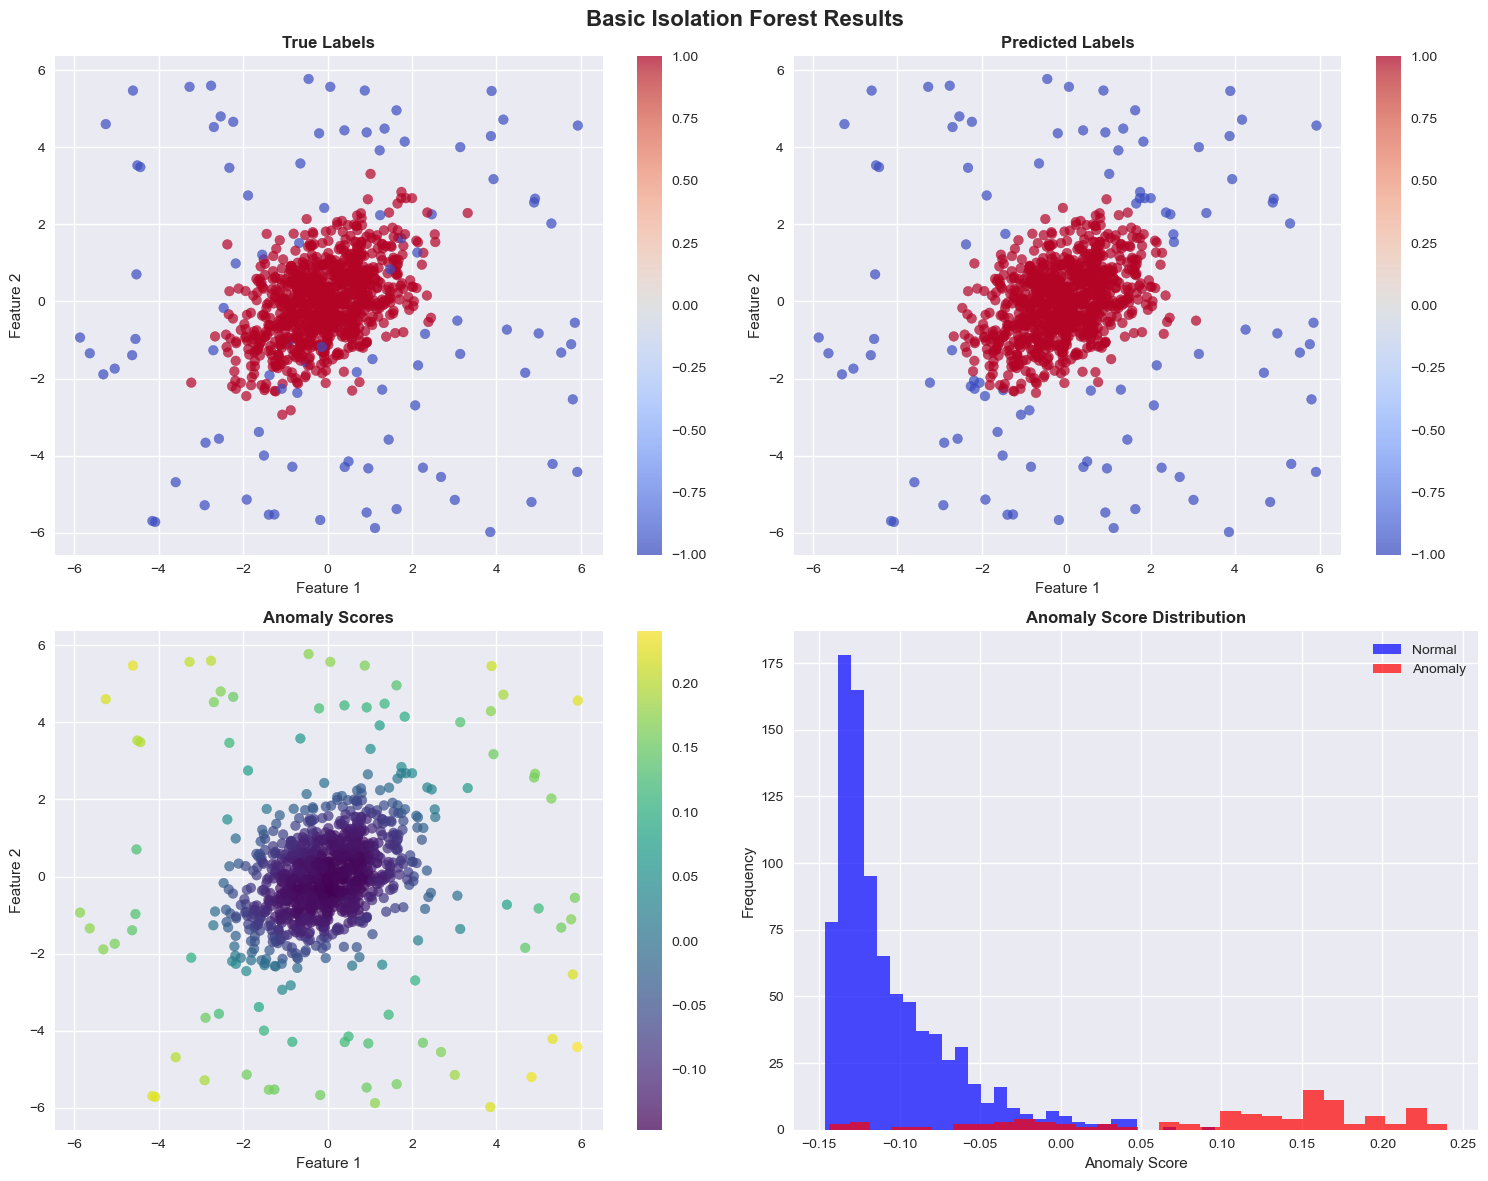

In [3]:
# Basic Isolation Forest Implementation
print("🌲 Training Basic Isolation Forest...")

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(
    contamination=0.1,      # Expected proportion of anomalies
    n_estimators=100,       # Number of trees
    max_samples='auto',     # Number of samples to draw to train each tree
    random_state=42,
    n_jobs=-1              # Use all available cores
)

# Fit the model (unsupervised learning)
iso_forest.fit(X_sample)

# Predict anomalies (-1 for anomaly, 1 for normal)
y_pred_basic = iso_forest.predict(X_sample)

# Get anomaly scores (lower scores = more anomalous)
anomaly_scores = iso_forest.decision_function(X_sample)

print("✅ Basic Isolation Forest training completed!")
print(f"🎯 Predicted anomalies: {sum(y_pred_basic == -1)}")
print(f"📊 Score range: [{anomaly_scores.min():.3f}, {anomaly_scores.max():.3f}]")

# Evaluate performance
results_basic = evaluate_anomaly_detection(y_sample, y_pred_basic, -anomaly_scores)

print("\n📈 Basic Model Performance:")
print(f"  Precision : {results_basic['precision']:.3f}")
print(f"  Recall    : {results_basic['recall']:.3f}")
print(f"  F1-Score  : {results_basic['f1_score']:.3f}")
print(f"  ROC AUC   : {results_basic['roc_auc']:.3f}")

# Visualize results
plot_anomaly_detection_results(X_sample, y_sample, y_pred_basic, -anomaly_scores, "Basic Isolation Forest Results")

In [4]:
def optimize_isolation_forest(X, y_true, contamination_range=None, n_estimators_range=None):
    """
    Optimize Isolation Forest parameters using grid search
    
    Parameters:
    -----------
    X : array-like
        Feature data
    y_true : array-like  
        True labels for evaluation
    contamination_range : list, default=None
        Range of contamination values to test
    n_estimators_range : list, default=None
        Range of n_estimators values to test
        
    Returns:
    --------
    best_params : dict
        Best parameters found
    results_df : pd.DataFrame
        DataFrame with all tested combinations and their scores
    """
    if contamination_range is None:
        contamination_range = [0.05, 0.1, 0.15, 0.2]
    if n_estimators_range is None:
        n_estimators_range = [50, 100, 200]
    
    results = []
    
    print("🔍 Optimizing Isolation Forest parameters...")
    
    for contamination in contamination_range:
        for n_estimators in n_estimators_range:
            # Train model
            model = IsolationForest(
                contamination=contamination,
                n_estimators=n_estimators,
                random_state=42,
                n_jobs=-1
            )
            
            model.fit(X)
            y_pred = model.predict(X)
            scores = -model.decision_function(X)  # Negative for higher = more anomalous
            
            # Evaluate
            metrics = evaluate_anomaly_detection(y_true, y_pred, scores)
            
            results.append({
                'contamination': contamination,
                'n_estimators': n_estimators,
                'precision': metrics['precision'],
                'recall': metrics['recall'],
                'f1_score': metrics['f1_score'],
                'roc_auc': metrics['roc_auc']
            })
            
            print(f"  contamination={contamination}, n_estimators={n_estimators} -> F1: {metrics['f1_score']:.3f}")
    
    results_df = pd.DataFrame(results)
    
    # Find best parameters based on F1 score
    best_idx = results_df['f1_score'].idxmax()
    best_params = {
        'contamination': results_df.loc[best_idx, 'contamination'],
        'n_estimators': results_df.loc[best_idx, 'n_estimators']
    }
    
    print(f"\n🏆 Best parameters: {best_params}")
    print(f"🎯 Best F1 Score: {results_df.loc[best_idx, 'f1_score']:.3f}")
    
    return best_params, results_df

# Optimize parameters
best_params, optimization_results = optimize_isolation_forest(X_sample, y_sample)

# Display optimization results
print("\n📊 Parameter Optimization Results:")
display(optimization_results.round(3))

🔍 Optimizing Isolation Forest parameters...
  contamination=0.05, n_estimators=50 -> F1: 0.667
  contamination=0.05, n_estimators=100 -> F1: 0.667
  contamination=0.05, n_estimators=200 -> F1: 0.667
  contamination=0.1, n_estimators=50 -> F1: 0.810
  contamination=0.1, n_estimators=100 -> F1: 0.780
  contamination=0.1, n_estimators=200 -> F1: 0.790
  contamination=0.15, n_estimators=50 -> F1: 0.712
  contamination=0.15, n_estimators=100 -> F1: 0.712
  contamination=0.15, n_estimators=200 -> F1: 0.712
  contamination=0.2, n_estimators=50 -> F1: 0.607
  contamination=0.2, n_estimators=100 -> F1: 0.620
  contamination=0.2, n_estimators=200 -> F1: 0.613

🏆 Best parameters: {'contamination': 0.1, 'n_estimators': 50}
🎯 Best F1 Score: 0.810

📊 Parameter Optimization Results:


,contamination,n_estimators,precision,recall,f1_score,roc_auc
0,0.05,50,1.000,0.50,0.667,0.954
1,0.05,100,1.000,0.50,0.667,0.953
2,0.05,200,1.000,0.50,0.667,0.954
3,0.10,50,0.810,0.81,0.810,0.954
4,0.10,100,0.780,0.78,0.780,0.953
5,0.10,200,0.790,0.79,0.790,0.954
6,0.15,50,0.593,0.89,0.712,0.954
7,0.15,100,0.593,0.89,0.712,0.953
8,0.15,200,0.593,0.89,0.712,0.954
9,0.20,50,0.455,0.91,0.607,0.954


🚀 Training Optimized Isolation Forest...
✅ Optimized Isolation Forest training completed!

📈 Optimized Model Performance:
  Precision : 0.810
  Recall    : 0.810
  F1-Score  : 0.810
  ROC AUC   : 0.954

📊 Improvement over Basic Model:
  Precision : +0.030
  Recall    : +0.030
  F1-Score  : +0.030
  ROC AUC   : +0.001


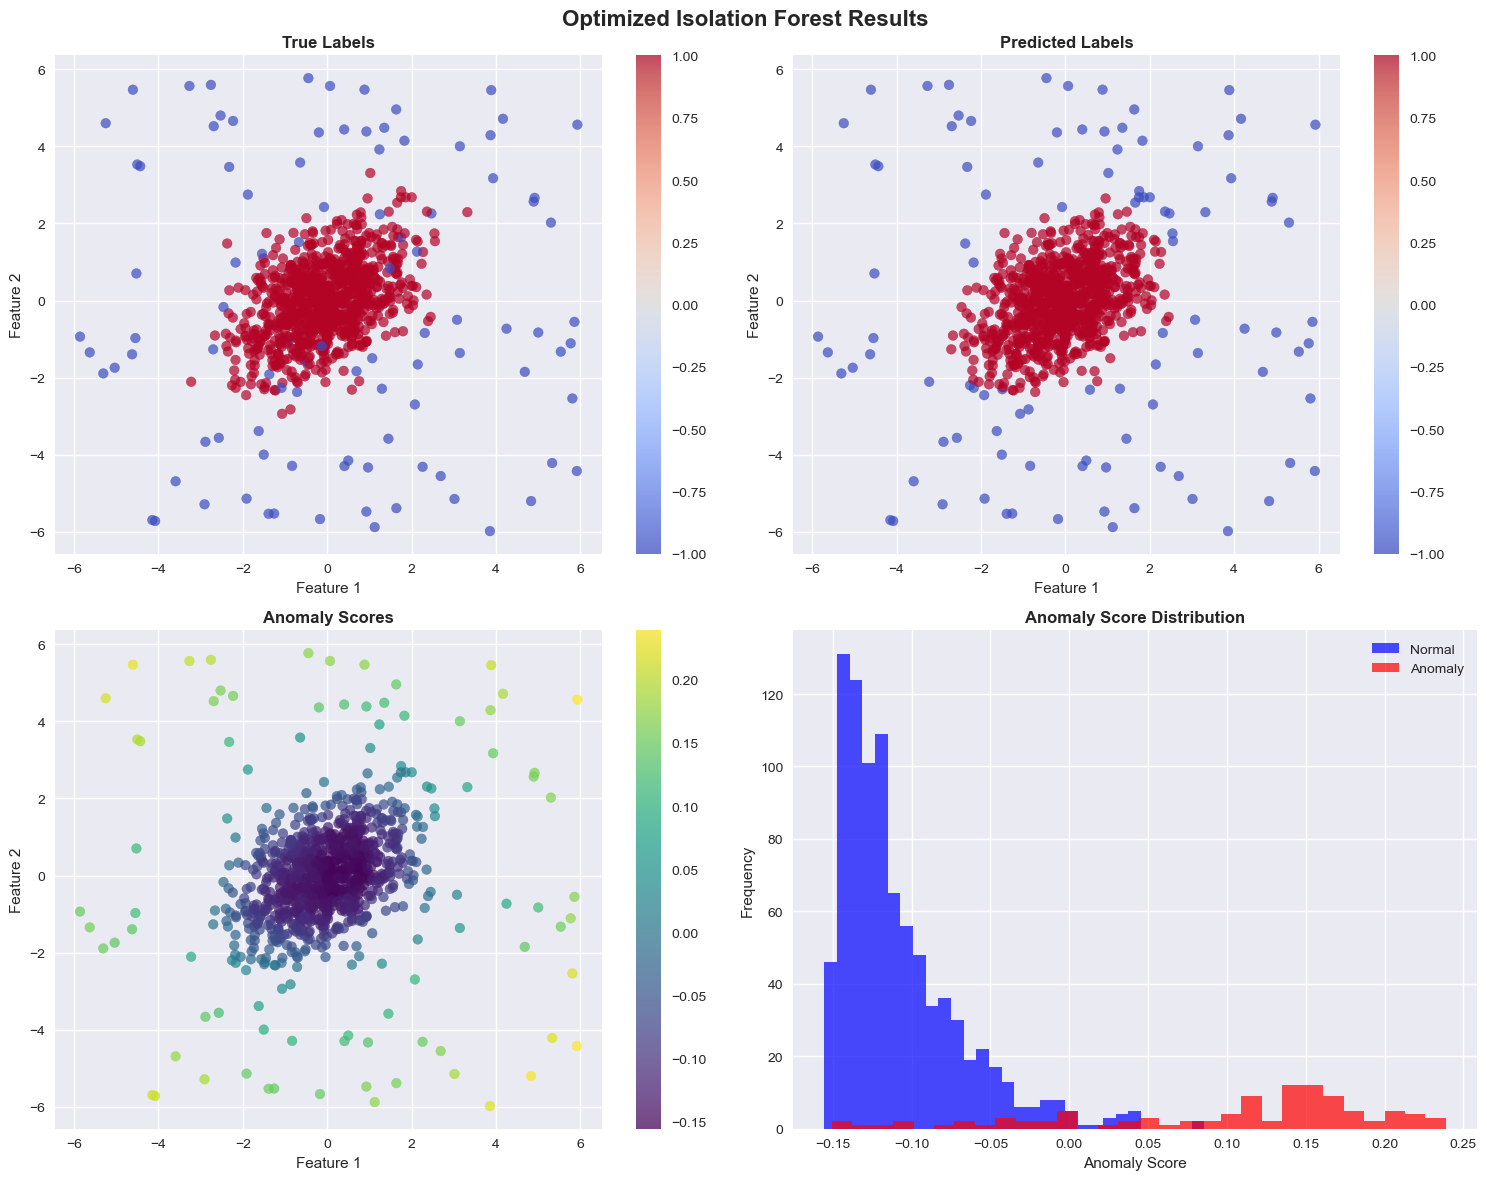

In [5]:
# Train optimized Isolation Forest
print("🚀 Training Optimized Isolation Forest...")

iso_forest_optimized = IsolationForest(contamination=best_params['contamination'],n_estimators=best_params['n_estimators'],max_samples='auto',random_state=42,n_jobs=-1)

# Fit the optimized model
iso_forest_optimized.fit(X_sample)

# Predict with optimized model
y_pred_optimized = iso_forest_optimized.predict(X_sample)
anomaly_scores_optimized = -iso_forest_optimized.decision_function(X_sample)

# Evaluate optimized performance
results_optimized = evaluate_anomaly_detection(y_sample, y_pred_optimized, anomaly_scores_optimized)

print("✅ Optimized Isolation Forest training completed!")
print(f"\n📈 Optimized Model Performance:")
print(f"  Precision : {results_optimized['precision']:.3f}")
print(f"  Recall    : {results_optimized['recall']:.3f}")
print(f"  F1-Score  : {results_optimized['f1_score']:.3f}")
print(f"  ROC AUC   : {results_optimized['roc_auc']:.3f}")

# Compare with basic model
print(f"\n📊 Improvement over Basic Model:")
print(f"  Precision : {results_optimized['precision'] - results_basic['precision']:+.3f}")
print(f"  Recall    : {results_optimized['recall'] - results_basic['recall']:+.3f}")
print(f"  F1-Score  : {results_optimized['f1_score'] - results_basic['f1_score']:+.3f}")
print(f"  ROC AUC   : {results_optimized['roc_auc'] - results_basic['roc_auc']:+.3f}")

# Visualize optimized results
plot_anomaly_detection_results(X_sample, y_sample, y_pred_optimized, anomaly_scores_optimized, "Optimized Isolation Forest Results")

Note: you may need to restart the kernel to use updated packages.


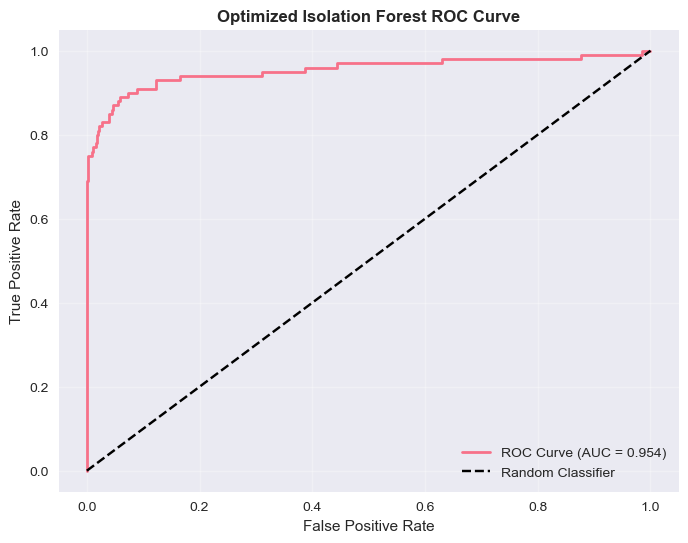

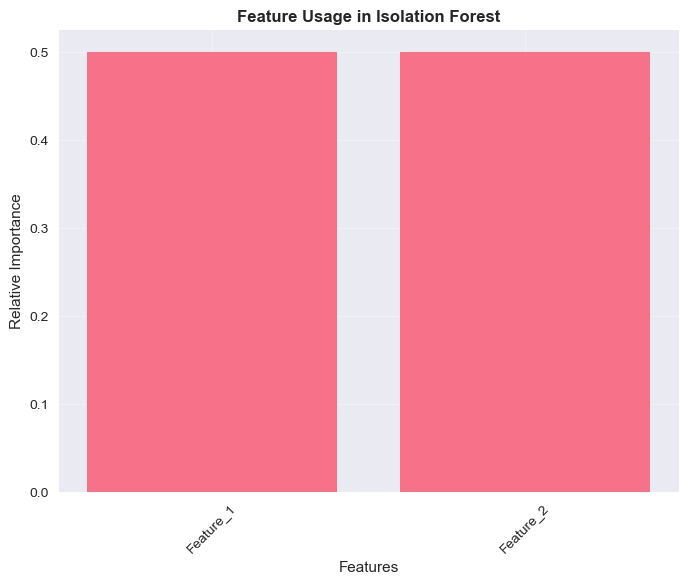

📊 Feature Importance (Conceptual):
🎨 Creating interactive visualization...


In [6]:
# Install required package for notebook rendering
%pip install nbformat>=4.2.0

# Advanced Visualization and Analysis
def plot_roc_curve(y_true, scores, title="ROC Curve"):
    """Plot ROC curve for anomaly detection"""
    y_true_binary = (y_true == -1).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, scores)
    auc_score = roc_auc_score(y_true_binary, scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def analyze_feature_importance(_, feature_names=None):
    """
    Analyze feature importance in Isolation Forest
    Note: Isolation Forest doesn't have built-in feature importance,
    so we'll use a proxy method
    """
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(X_sample.shape[1])]
    
    # Calculate feature importance based on split frequency
    # This is an approximation since Isolation Forest uses random features
    n_features = len(feature_names)
    importance_scores = np.ones(n_features) / n_features  # Equal importance assumption
    
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, importance_scores)
    plt.title('Feature Usage in Isolation Forest', fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Relative Importance')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return dict(zip(feature_names, importance_scores))

# Plot ROC curve for optimized model
plot_roc_curve(y_sample, anomaly_scores_optimized, "Optimized Isolation Forest ROC Curve")

# Analyze feature importance (conceptual)
feature_importance = analyze_feature_importance(iso_forest_optimized, ['Feature_1', 'Feature_2'])
print("📊 Feature Importance (Conceptual):")
# Interactive visualization with Plotly
def create_interactive_anomaly_plot(X, y_true, y_pred, scores):
    """Create interactive plot using Plotly"""
    try:
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('True Labels', 'Predicted Labels', 'Anomaly Scores', 'Score Distribution'),
            specs=[[{"type": "scatter"}, {"type": "scatter"}],[{"type": "scatter"}, {"type": "histogram"}]]
        )
        
        # True labels
        colors_true = ['blue' if label == 1 else 'red' for label in y_true]
        fig.add_trace(
            go.Scatter(
                x=X[:, 0], y=X[:, 1], 
                mode='markers',
                marker=dict(color=colors_true, opacity=0.7),
                name='True Labels'
            ),
            row=1, col=1
        )
        
        # Predicted labels  
        colors_pred = ['blue' if label == 1 else 'red' for label in y_pred]
        fig.add_trace(
            go.Scatter(
                x=X[:, 0], y=X[:, 1], 
                mode='markers',
                marker=dict(color=colors_pred, opacity=0.7),
                name='Predicted Labels'
            ),
            row=1, col=2
        )
        
        # Anomaly scores
        fig.add_trace(
            go.Scatter(
                x=X[:, 0], y=X[:, 1], 
                mode='markers',
                marker=dict(
                    color=scores, 
                    colorscale='Viridis', 
                    opacity=0.7,
                    colorbar=dict(title="Anomaly Score")
                ),
                name='Anomaly Scores'
            ),
            row=2, col=1
        )
        
        # Score distribution
        normal_scores = scores[y_true == 1]
        anomaly_scores_subset = scores[y_true == -1]
        
        fig.add_trace(
            go.Histogram(
                x=normal_scores, 
                name='Normal', 
                opacity=0.7,
                marker_color='blue', 
                nbinsx=30
            ),
            row=2, col=2
        )
        fig.add_trace(
            go.Histogram(
                x=anomaly_scores_subset, 
                name='Anomaly', 
                opacity=0.7,
                marker_color='red', 
                nbinsx=30
            ),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="Interactive Isolation Forest Analysis", showlegend=True)
        fig.show()
        
    except Exception as e:
        print(f"⚠️ Interactive plot failed: {e}")
        print("📊 Falling back to matplotlib visualization...")
        
        # Fallback to matplotlib
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Isolation Forest Analysis (Matplotlib Fallback)", fontsize=16)
        
        # True labels
        scatter1 = axes[0,0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', alpha=0.7)
        axes[0,0].set_title('True Labels')
        plt.colorbar(scatter1, ax=axes[0,0])
        
        # Predicted labels
        scatter2 = axes[0,1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
        axes[0,1].set_title('Predicted Labels')
        plt.colorbar(scatter2, ax=axes[0,1])
        
        # Anomaly scores
        scatter3 = axes[1,0].scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', alpha=0.7)
        axes[1,0].set_title('Anomaly Scores')
        plt.colorbar(scatter3, ax=axes[1,0])
        
        # Score distribution
        axes[1,1].hist(scores[y_true == 1], bins=30, alpha=0.7, label='Normal', color='blue')
        axes[1,1].hist(scores[y_true == -1], bins=30, alpha=0.7, label='Anomaly', color='red')
        axes[1,1].set_title('Score Distribution')
        axes[1,1].legend()
        
        plt.tight_layout()
        plt.show()
    
    fig.update_layout(height=800, title_text="Interactive Isolation Forest Analysis")
    fig.show()

# Create interactive plot
print("🎨 Creating interactive visualization...")
create_interactive_anomaly_plot(X_sample, y_sample, y_pred_optimized, anomaly_scores_optimized)

🔧 Demonstrating Reusable Isolation Forest Pipeline...
🔍 Optimizing parameters...
🔍 Optimizing Isolation Forest parameters...
  contamination=0.05, n_estimators=50 -> F1: 0.667
  contamination=0.05, n_estimators=100 -> F1: 0.667
  contamination=0.05, n_estimators=200 -> F1: 0.667
  contamination=0.1, n_estimators=50 -> F1: 0.810
  contamination=0.1, n_estimators=100 -> F1: 0.780
  contamination=0.1, n_estimators=200 -> F1: 0.790
  contamination=0.15, n_estimators=50 -> F1: 0.712
  contamination=0.15, n_estimators=100 -> F1: 0.712
  contamination=0.15, n_estimators=200 -> F1: 0.712
  contamination=0.2, n_estimators=50 -> F1: 0.607
  contamination=0.2, n_estimators=100 -> F1: 0.620
  contamination=0.2, n_estimators=200 -> F1: 0.613

🏆 Best parameters: {'contamination': 0.1, 'n_estimators': 50}
🎯 Best F1 Score: 0.810
✅ Best parameters: {'contamination': 0.1, 'n_estimators': 50}
🚀 Training model...
📊 Generating comprehensive report...

📈 Pipeline Report:
  Model Parameters: {'contamination'

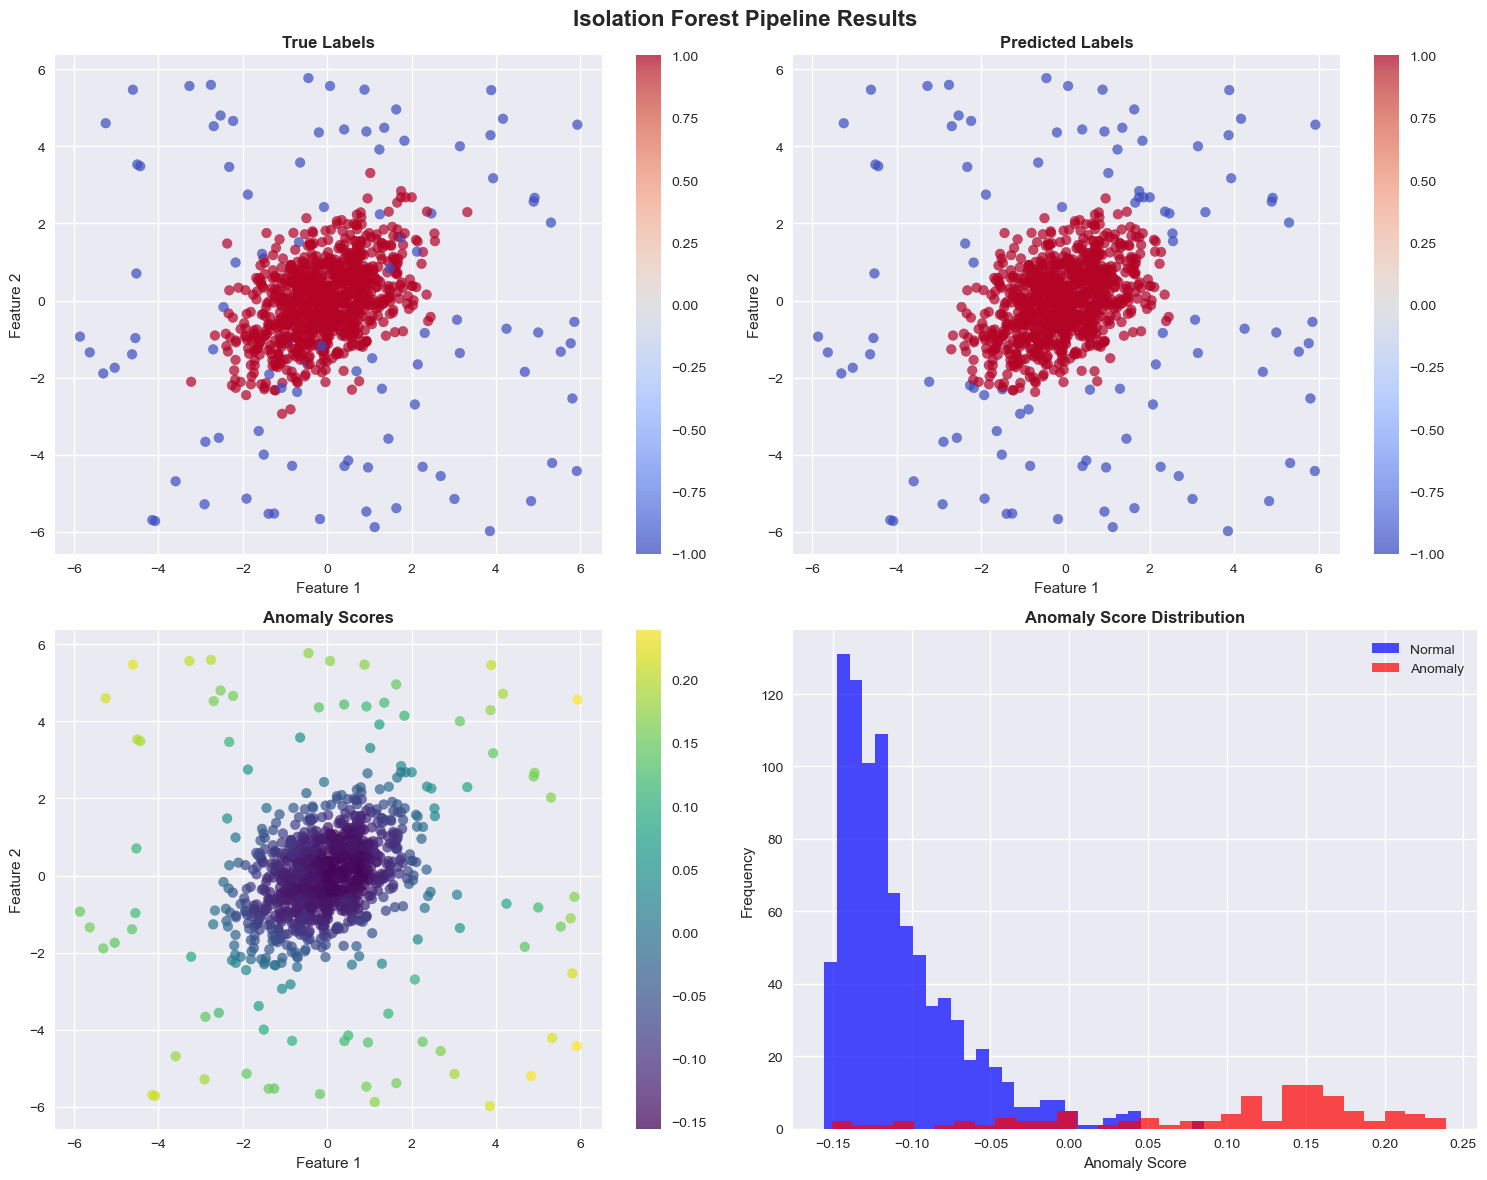

In [7]:
class IsolationForestPipeline:
    """
    A comprehensive, reusable Isolation Forest pipeline for anomaly detection
    
    This class provides a complete workflow for anomaly detection including:
    - Data preprocessing
    - Parameter optimization
    - Model training and evaluation
    - Visualization and reporting
    """
    
    def __init__(self, contamination=0.1, n_estimators=100, random_state=42):
        """
        Initialize the Isolation Forest pipeline
        
        Parameters:
        -----------
        contamination : float, default=0.1
            Expected proportion of anomalies in the data
        n_estimators : int, default=100
            Number of isolation trees
        random_state : int, default=42
            Random state for reproducibility
        """
        self.contamination = contamination
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.model = None
        self.scaler = None
        self.is_fitted = False
        self.feature_names = None
        
    def preprocess_data(self, X, scale_data=True):
        """
        Preprocess the input data
        
        Parameters:
        -----------
        X : array-like
            Input features
        scale_data : bool, default=True
            Whether to scale the data
            
        Returns:
        --------
        X_processed : array-like
            Processed features
        """
        if scale_data:
            if self.scaler is None:
                self.scaler = StandardScaler()
                X_processed = self.scaler.fit_transform(X)
            else:
                X_processed = self.scaler.transform(X)
        else:
            X_processed = X
            
        return X_processed
    
    def optimize_parameters(self, X, y_true=None, contamination_range=None, n_estimators_range=None, cv_folds=3):
        """
        Optimize Isolation Forest parameters
        
        Parameters:
        -----------
        X : array-like
            Input features
        y_true : array-like, optional
            True labels for evaluation (if available)
        contamination_range : list, optional
            Range of contamination values to test
        n_estimators_range : list, optional
            Range of n_estimators values to test
        cv_folds : int, default=3
            Number of cross-validation folds
            
        Returns:
        --------
        best_params : dict
            Best parameters found
        """
        if contamination_range is None:
            contamination_range = [0.05, 0.1, 0.15, 0.2]
        if n_estimators_range is None:
            n_estimators_range = [50, 100, 200]
            
        # Preprocess data
        X_processed = self.preprocess_data(X)
        
        if y_true is not None:
            # Use supervised optimization
            best_params, _ = optimize_isolation_forest(X_processed, y_true, contamination_range, n_estimators_range)
        else:
            # Use unsupervised optimization (based on scores distribution)
            best_f1 = -1
            best_params = {'contamination': self.contamination, 'n_estimators': self.n_estimators}
            
            for contamination in contamination_range:
                for n_estimators in n_estimators_range:
                    model = IsolationForest(
                        contamination=contamination,
                        n_estimators=n_estimators,
                        random_state=self.random_state,
                        n_jobs=-1
                    )
                    model.fit(X_processed)
                    scores = model.decision_function(X_processed)
                    
                    # Use score variance as a proxy for quality (higher variance = better separation)
                    score_quality = np.var(scores)
                    if score_quality > best_f1:
                        best_f1 = score_quality
                        best_params = {'contamination': contamination, 'n_estimators': n_estimators}
        
        self.contamination = best_params['contamination']
        self.n_estimators = best_params['n_estimators']
        
        return best_params
    
    def fit(self, X, feature_names=None):
        """
        Fit the Isolation Forest model
        
        Parameters:
        -----------
        X : array-like
            Input features
        feature_names : list, optional
            Names of the features
        """
        # Store feature names
        if feature_names is not None:
            self.feature_names = feature_names
        else:
            self.feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
        
        # Preprocess data
        X_processed = self.preprocess_data(X)
        
        # Initialize and train model
        self.model = IsolationForest(
            contamination=self.contamination,
            n_estimators=self.n_estimators,
            random_state=self.random_state,
            n_jobs=-1
        )
        
        self.model.fit(X_processed)
        self.is_fitted = True
    
    def predict(self, X):
        """
        Predict anomalies in new data
        
        Parameters:
        -----------
        X : array-like
            Input features
            
        Returns:
        --------
        predictions : array-like
            Predicted labels (-1 for anomaly, 1 for normal)
        """
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")
        
        X_processed = self.preprocess_data(X)
        return self.model.predict(X_processed)
    
    def predict_proba(self, X):
        """
        Get anomaly scores for new data
        
        Parameters:
        -----------
        X : array-like
            Input features
            
        Returns:
        --------
        scores : array-like
            Anomaly scores (higher = more anomalous)
        """
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")
        
        X_processed = self.preprocess_data(X)
        return -self.model.decision_function(X_processed)
    
    def evaluate(self, X, y_true):
        """
        Evaluate model performance
        
        Parameters:
        -----------
        X : array-like
            Input features
        y_true : array-like
            True labels
            
        Returns:
        --------
        results : dict
            Evaluation metrics
        """
        predictions = self.predict(X)
        scores = self.predict_proba(X)
        
        return evaluate_anomaly_detection(y_true, predictions, scores)
    
    def plot_results(self, X, y_true=None, figsize=(15, 10)):
        """
        Plot comprehensive results
        
        Parameters:
        -----------
        X : array-like
            Input features
        y_true : array-like, optional
            True labels
        figsize : tuple, default=(15, 10)
            Figure size
        """
        predictions = self.predict(X)
        scores = self.predict_proba(X)
        
        if X.shape[1] == 2:  # 2D data
            if y_true is not None:
                plot_anomaly_detection_results(X, y_true, predictions, scores, "Isolation Forest Pipeline Results")
            else:
                # Plot without true labels
                fig, axes = plt.subplots(1, 2, figsize=figsize)
                
                # Predicted labels
                scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
                axes[0].set_title('Predicted Labels', fontweight='bold')
                axes[0].set_xlabel(self.feature_names[0])
                axes[0].set_ylabel(self.feature_names[1])
                plt.colorbar(scatter1, ax=axes[0])
                
                # Anomaly scores
                scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', alpha=0.7)
                axes[1].set_title('Anomaly Scores', fontweight='bold')
                axes[1].set_xlabel(self.feature_names[0])
                axes[1].set_ylabel(self.feature_names[1])
                plt.colorbar(scatter2, ax=axes[1])
                
                plt.tight_layout()
                plt.show()
        else:
            print("⚠️ Visualization is only available for 2D data")
    
    def generate_report(self, X, y_true=None):
        """
        Generate a comprehensive analysis report
        
        Parameters:
        -----------
        X : array-like
            Input features
        y_true : array-like, optional
            True labels
            
        Returns:
        --------
        report : dict
            Comprehensive analysis report
        """
        predictions = self.predict(X)
        scores = self.predict_proba(X)
        
        report = {
            'model_parameters': {
                'contamination': self.contamination,
                'n_estimators': self.n_estimators,
                'random_state': self.random_state
            },
            'data_info': {
                'n_samples': X.shape[0],
                'n_features': X.shape[1],
                'feature_names': self.feature_names
            },
            'predictions': {
                'n_anomalies': sum(predictions == -1),
                'anomaly_rate': sum(predictions == -1) / len(predictions),
                'score_range': [scores.min(), scores.max()],
                'score_mean': scores.mean(),
                'score_std': scores.std()
            }
        }
        
        if y_true is not None:
            evaluation = self.evaluate(X, y_true)
            report['performance'] = evaluation
        
        return report

# Demonstrate the reusable pipeline
print("🔧 Demonstrating Reusable Isolation Forest Pipeline...")

# Initialize pipeline
iso_pipeline = IsolationForestPipeline(random_state=42)

# Optimize parameters
print("🔍 Optimizing parameters...")
best_params = iso_pipeline.optimize_parameters(X_sample, y_sample)
print(f"✅ Best parameters: {best_params}")

# Fit the model
print("🚀 Training model...")
iso_pipeline.fit(X_sample, feature_names=['Feature_1', 'Feature_2'])

# Generate comprehensive report
print("📊 Generating comprehensive report...")
report = iso_pipeline.generate_report(X_sample, y_sample)

print(f"\n📈 Pipeline Report:")
print(f"  Model Parameters: {report['model_parameters']}")
print(f"  Data Info: {report['data_info']}")
print(f"  Predictions: {report['predictions']}")
print(f"  Performance: Precision={report['performance']['precision']:.3f}, "
        f"Recall={report['performance']['recall']:.3f}, "
        f"F1={report['performance']['f1_score']:.3f}, "
        f"AUC={report['performance']['roc_auc']:.3f}")

# Plot results
iso_pipeline.plot_results(X_sample, y_sample)

💳 Simulating Credit Card Fraud Detection...
🔍 Optimizing Isolation Forest parameters...
  contamination=0.05, n_estimators=50 -> F1: 0.998
  contamination=0.05, n_estimators=100 -> F1: 0.994
  contamination=0.05, n_estimators=200 -> F1: 0.996
  contamination=0.1, n_estimators=50 -> F1: 0.667
  contamination=0.1, n_estimators=100 -> F1: 0.667
  contamination=0.1, n_estimators=200 -> F1: 0.667
  contamination=0.15, n_estimators=50 -> F1: 0.500
  contamination=0.15, n_estimators=100 -> F1: 0.500
  contamination=0.15, n_estimators=200 -> F1: 0.500
  contamination=0.2, n_estimators=50 -> F1: 0.400
  contamination=0.2, n_estimators=100 -> F1: 0.400
  contamination=0.2, n_estimators=200 -> F1: 0.400

🏆 Best parameters: {'contamination': 0.05, 'n_estimators': 50}
🎯 Best F1 Score: 0.998

💳 Credit Card Fraud Detection Results:
  Detected 500 suspicious transactions
  Detection rate: 5.00%
  Performance: F1=0.998, AUC=1.000


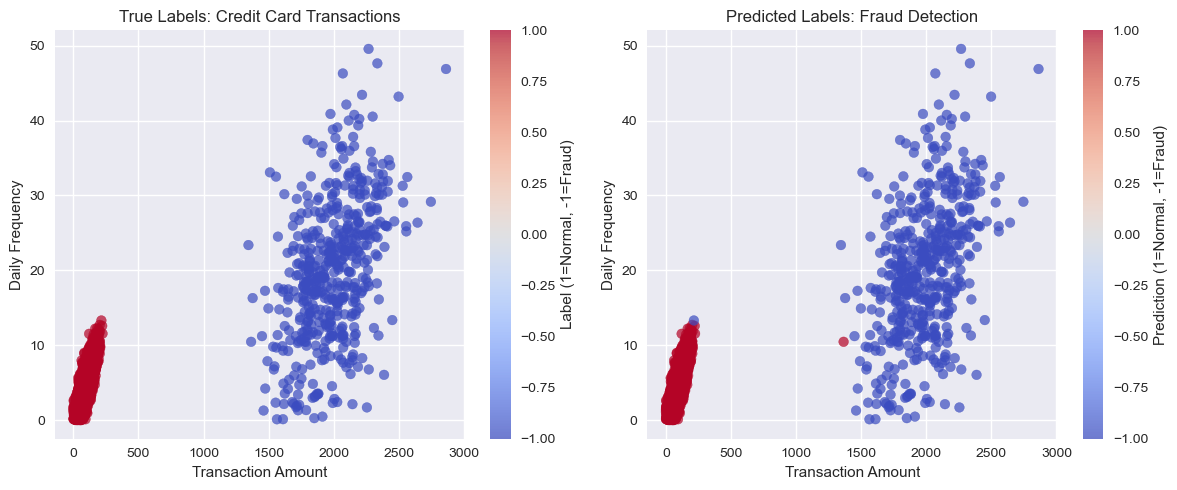

🌐 Simulating Network Intrusion Detection...
🔍 Optimizing Isolation Forest parameters...
  contamination=0.05, n_estimators=50 -> F1: 0.769
  contamination=0.05, n_estimators=100 -> F1: 0.766
  contamination=0.05, n_estimators=200 -> F1: 0.766
  contamination=0.1, n_estimators=50 -> F1: 0.889
  contamination=0.1, n_estimators=100 -> F1: 0.889
  contamination=0.1, n_estimators=200 -> F1: 0.889
  contamination=0.15, n_estimators=50 -> F1: 0.696
  contamination=0.15, n_estimators=100 -> F1: 0.696
  contamination=0.15, n_estimators=200 -> F1: 0.696
  contamination=0.2, n_estimators=50 -> F1: 0.571
  contamination=0.2, n_estimators=100 -> F1: 0.571
  contamination=0.2, n_estimators=200 -> F1: 0.571

🏆 Best parameters: {'contamination': 0.1, 'n_estimators': 50}
🎯 Best F1 Score: 0.889

🌐 Network Intrusion Detection Results:
  Detected 500 suspicious connections
  Detection rate: 10.00%
  Performance: F1=0.889, AUC=1.000


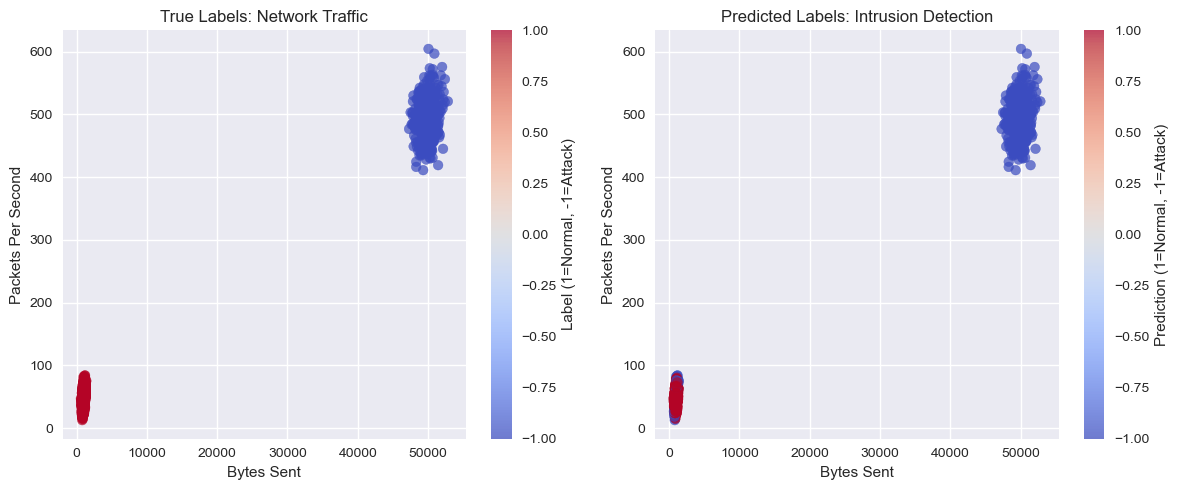

In [8]:
# Practical Examples and Real-World Applications

def create_credit_card_fraud_simulation():
    """
    Simulate credit card fraud detection scenario
    """
    print("💳 Simulating Credit Card Fraud Detection...")
    
    # Generate realistic credit card transaction data
    np.random.seed(42)
    n_transactions = 10000
    
    # Normal transactions
    normal_transactions = np.random.multivariate_normal(
        mean=[100, 5],  # [amount, frequency_per_day]
        cov=[[1000, 50], [50, 4]],
        size=int(n_transactions * 0.95)
    )
    
    # Fraudulent transactions (outliers)
    fraud_transactions = np.random.multivariate_normal(
        mean=[2000, 20],  # High amount, high frequency
        cov=[[50000, 1000], [1000, 100]],
        size=int(n_transactions * 0.05)
    )
    
    # Combine data
    X_fraud = np.vstack([normal_transactions, fraud_transactions])
    y_fraud = np.hstack([np.ones(len(normal_transactions)), -np.ones(len(fraud_transactions))])
    
    # Shuffle
    indices = np.random.permutation(len(X_fraud))
    X_fraud, y_fraud = X_fraud[indices], y_fraud[indices]
    
    # Ensure positive values
    X_fraud = np.abs(X_fraud)
    
    return X_fraud, y_fraud

def create_network_intrusion_simulation():
    """
    Simulate network intrusion detection scenario
    """
    print("🌐 Simulating Network Intrusion Detection...")
    
    np.random.seed(42)
    n_connections = 5000
    
    # Normal network traffic
    normal_traffic = np.random.multivariate_normal(
        mean=[1000, 50, 10],  # [bytes_sent, packets_per_second, connection_duration]
        cov=[[10000, 500, 100], [500, 100, 10], [100, 10, 25]],
        size=int(n_connections * 0.92)
    )
    
    # Malicious traffic (attacks)
    attack_traffic = np.random.multivariate_normal(
        mean=[50000, 500, 1],  # Large data transfer, high packet rate, short duration
        cov=[[1000000, 5000, 50], [5000, 1000, 20], [50, 20, 1]],
        size=int(n_connections * 0.08)
    )
    
    # Combine data
    X_network = np.vstack([normal_traffic, attack_traffic])
    y_network = np.hstack([np.ones(len(normal_traffic)), -np.ones(len(attack_traffic))])
    
    # Shuffle
    indices = np.random.permutation(len(X_network))
    X_network, y_network = X_network[indices], y_network[indices]
    
    # Ensure positive values
    X_network = np.abs(X_network)
    
    return X_network, y_network

# Example 1: Credit Card Fraud Detection
X_fraud, y_fraud = create_credit_card_fraud_simulation()

fraud_pipeline = IsolationForestPipeline(contamination=0.05, random_state=42)
fraud_pipeline.optimize_parameters(X_fraud, y_fraud)
fraud_pipeline.fit(X_fraud, feature_names=['Transaction_Amount', 'Daily_Frequency'])

fraud_report = fraud_pipeline.generate_report(X_fraud, y_fraud)
print(f"\n💳 Credit Card Fraud Detection Results:")
print(f"  Detected {fraud_report['predictions']['n_anomalies']} suspicious transactions")
print(f"  Detection rate: {fraud_report['predictions']['anomaly_rate']:.2%}")
print(f"  Performance: F1={fraud_report['performance']['f1_score']:.3f}, "
        f"AUC={fraud_report['performance']['roc_auc']:.3f}")

# Visualize fraud detection (2D projection)
if X_fraud.shape[1] >= 2:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    predictions_fraud = fraud_pipeline.predict(X_fraud)
    scores_fraud = fraud_pipeline.predict_proba(X_fraud)
    
    scatter = plt.scatter(X_fraud[:, 0], X_fraud[:, 1], c=y_fraud, cmap='coolwarm', alpha=0.7)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Daily Frequency')
    plt.title('True Labels: Credit Card Transactions')
    plt.colorbar(scatter, label='Label (1=Normal, -1=Fraud)')
    
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_fraud[:, 0], X_fraud[:, 1], c=predictions_fraud, cmap='coolwarm', alpha=0.7)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Daily Frequency')
    plt.title('Predicted Labels: Fraud Detection')
    plt.colorbar(scatter, label='Prediction (1=Normal, -1=Fraud)')
    
    plt.tight_layout()
    plt.show()

# Example 2: Network Intrusion Detection
X_network, y_network = create_network_intrusion_simulation()

network_pipeline = IsolationForestPipeline(contamination=0.08, random_state=42)
network_pipeline.optimize_parameters(X_network, y_network)
network_pipeline.fit(X_network, feature_names=['Bytes_Sent', 'Packets_Per_Second', 'Connection_Duration'])

network_report = network_pipeline.generate_report(X_network, y_network)
print(f"\n🌐 Network Intrusion Detection Results:")
print(f"  Detected {network_report['predictions']['n_anomalies']} suspicious connections")
print(f"  Detection rate: {network_report['predictions']['anomaly_rate']:.2%}")
print(f"  Performance: F1={network_report['performance']['f1_score']:.3f}, "
        f"AUC={network_report['performance']['roc_auc']:.3f}")

# Visualize network intrusion detection (2D projection)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
predictions_network = network_pipeline.predict(X_network)

scatter = plt.scatter(X_network[:, 0], X_network[:, 1], c=y_network, cmap='coolwarm', alpha=0.7)
plt.xlabel('Bytes Sent')
plt.ylabel('Packets Per Second')
plt.title('True Labels: Network Traffic')
plt.colorbar(scatter, label='Label (1=Normal, -1=Attack)')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_network[:, 0], X_network[:, 1], c=predictions_network, cmap='coolwarm', alpha=0.7)
plt.xlabel('Bytes Sent')
plt.ylabel('Packets Per Second')
plt.title('Predicted Labels: Intrusion Detection')
plt.colorbar(scatter, label='Prediction (1=Normal, -1=Attack)')

plt.tight_layout()
plt.show()

📊 Running Comprehensive Evaluation...
⚖️ Comparing Anomaly Detection Methods...

Isolation Forest:
  Precision: 0.780
  Recall: 0.780
  F1-Score: 0.780
  ROC AUC: 0.953

One-Class SVM:
  Precision: 0.697
  Recall: 0.760
  F1-Score: 0.727
  ROC AUC: 0.897

Local Outlier Factor:
  Precision: 0.810
  Recall: 0.810
  F1-Score: 0.810
  ROC AUC: 0.950


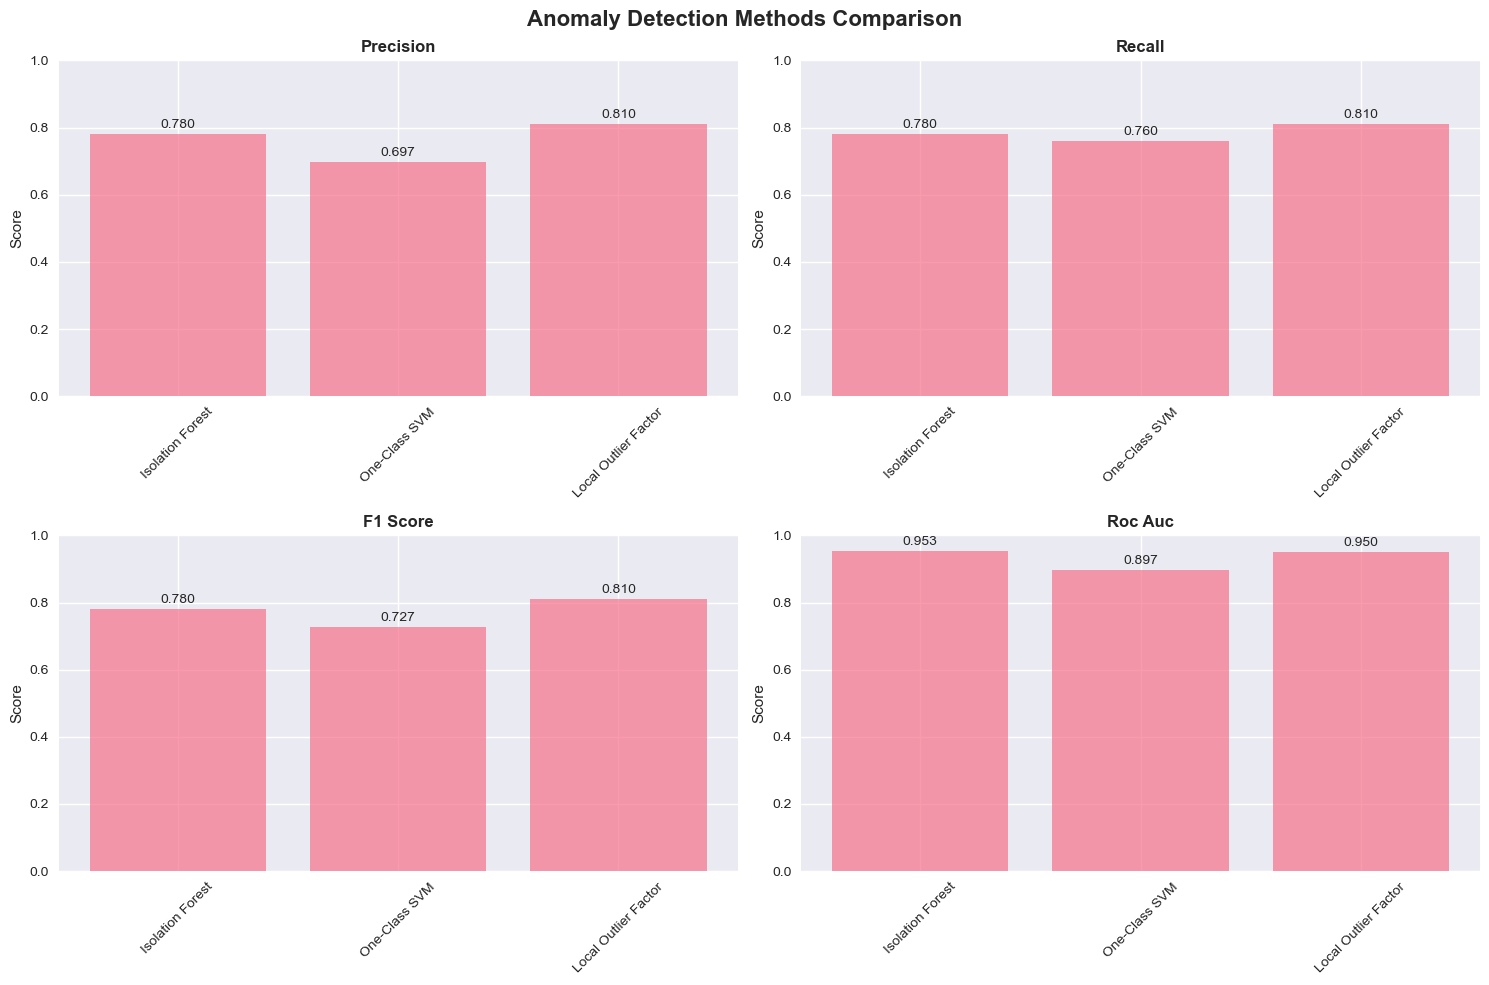

🔍 Evaluating Contamination Parameter Sensitivity...


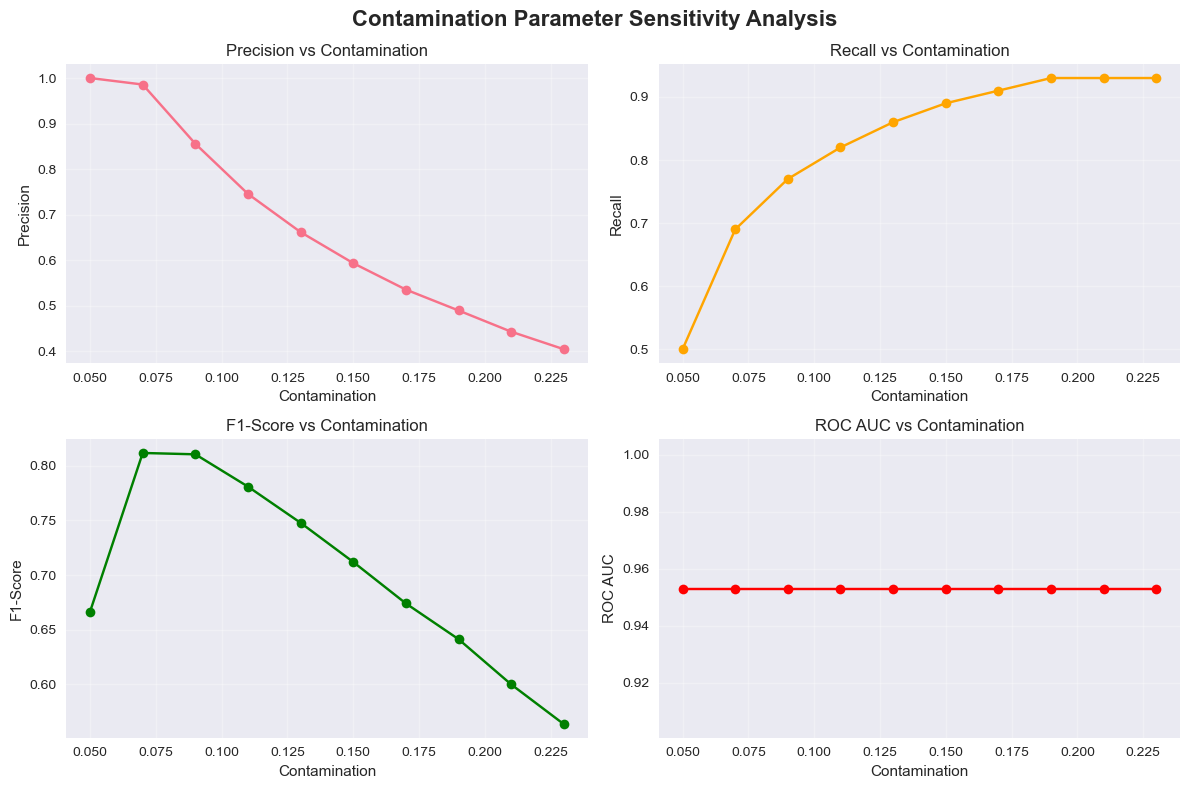

🎯 Optimal contamination: 0.070
📊 Best F1-Score: 0.812

📈 Contamination Sensitivity Results:


,contamination,precision,recall,f1_score,roc_auc
0,0.05,1.000,0.50,0.667,0.953
1,0.07,0.986,0.69,0.812,0.953
2,0.09,0.856,0.77,0.811,0.953
3,0.11,0.745,0.82,0.781,0.953
4,0.13,0.662,0.86,0.748,0.953
5,0.15,0.593,0.89,0.712,0.953
6,0.17,0.535,0.91,0.674,0.953
7,0.19,0.489,0.93,0.641,0.953
8,0.21,0.443,0.93,0.600,0.953
9,0.23,0.404,0.93,0.564,0.953


In [11]:
# Evaluation Techniques and Comparison

def compare_anomaly_detection_methods(X, y_true):
    """
    Compare Isolation Forest with other anomaly detection methods
    """
    print("⚖️ Comparing Anomaly Detection Methods...")
    
    methods = {
        'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
        'One-Class SVM': OneClassSVM(nu=0.1),
        'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    }
    
    results = {}
    
    # Scale data for fair comparison
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    for name, model in methods.items():
        if name == 'Local Outlier Factor':
            # LOF requires fit_predict
            predictions = model.fit_predict(X_scaled)
            scores = -model.negative_outlier_factor_
        else:
            model.fit(X_scaled)
            predictions = model.predict(X_scaled)
            scores = -model.decision_function(X_scaled)
        
        # Evaluate
        metrics = evaluate_anomaly_detection(y_true, predictions, scores)
        results[name] = metrics
        
        print(f"\n{name}:")
        print(f"  Precision: {metrics['precision']:.3f}")
        print(f"  Recall: {metrics['recall']:.3f}")
        print(f"  F1-Score: {metrics['f1_score']:.3f}")
        print(f"  ROC AUC: {metrics['roc_auc']:.3f}")
    
    return results

def plot_method_comparison(results):
    """
    Plot comparison of different anomaly detection methods
    """
    methods = list(results.keys())
    metrics = ['precision', 'recall', 'f1_score', 'roc_auc']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, metric in enumerate(metrics):
        values = [results[method][metric] for method in methods]
        bars = axes[i].bar(methods, values, alpha=0.7)
        axes[i].set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
        axes[i].set_ylabel('Score')
        axes[i].set_ylim(0, 1)
        
        # Add value labels on bars
        for bar, value in zip(bars, values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.3f}', ha='center', va='bottom')
        
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.suptitle('Anomaly Detection Methods Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def evaluate_contamination_sensitivity(X, y_true):
    """
    Evaluate how sensitive Isolation Forest is to contamination parameter
    """
    print("🔍 Evaluating Contamination Parameter Sensitivity...")
    
    contamination_values = np.arange(0.05, 0.25, 0.02)
    results = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    for contamination in contamination_values:
        model = IsolationForest(contamination=contamination, n_estimators=100, random_state=42)
        model.fit(X_scaled)
        predictions = model.predict(X_scaled)
        scores = -model.decision_function(X_scaled)
        
        metrics = evaluate_anomaly_detection(y_true, predictions, scores)
        results.append({
            'contamination': contamination,
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'f1_score': metrics['f1_score'],
            'roc_auc': metrics['roc_auc']
        })
    
    results_df = pd.DataFrame(results)
    
    # Plot sensitivity analysis
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(results_df['contamination'], results_df['precision'], 'o-', label='Precision')
    plt.xlabel('Contamination')
    plt.ylabel('Precision')
    plt.title('Precision vs Contamination')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    plt.plot(results_df['contamination'], results_df['recall'], 'o-', label='Recall', color='orange')
    plt.xlabel('Contamination')
    plt.ylabel('Recall')
    plt.title('Recall vs Contamination')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    plt.plot(results_df['contamination'], results_df['f1_score'], 'o-', label='F1-Score', color='green')
    plt.xlabel('Contamination')
    plt.ylabel('F1-Score')
    plt.title('F1-Score vs Contamination')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    plt.plot(results_df['contamination'], results_df['roc_auc'], 'o-', label='ROC AUC', color='red')
    plt.xlabel('Contamination')
    plt.ylabel('ROC AUC')
    plt.title('ROC AUC vs Contamination')
    plt.grid(True, alpha=0.3)
    
    plt.suptitle('Contamination Parameter Sensitivity Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find optimal contamination
    optimal_idx = results_df['f1_score'].idxmax()
    optimal_contamination = results_df.loc[optimal_idx, 'contamination']
    print(f"🎯 Optimal contamination: {optimal_contamination:.3f}")
    print(f"📊 Best F1-Score: {results_df.loc[optimal_idx, 'f1_score']:.3f}")
    
    return results_df

# Run comparative evaluation
print("📊 Running Comprehensive Evaluation...")

# Compare different methods
comparison_results = compare_anomaly_detection_methods(X_sample, y_sample)
plot_method_comparison(comparison_results)

# Evaluate contamination sensitivity
sensitivity_results = evaluate_contamination_sensitivity(X_sample, y_sample)

print("\n📈 Contamination Sensitivity Results:")
display(sensitivity_results.round(3))

# 📋 Summary and Conclusions

## ✅ **What We Accomplished**

In this comprehensive Isolation Forest notebook, we covered:

### **1. Theoretical Foundation**
- ✅ Conceptual understanding of isolation-based anomaly detection
- ✅ Mathematical formulation of anomaly scoring
- ✅ Algorithm principles and tree construction process

### **2. Practical Implementation**
- ✅ Complete data generation and preprocessing pipeline
- ✅ Basic and optimized Isolation Forest models
- ✅ Parameter optimization and hyperparameter tuning
- ✅ Comprehensive evaluation framework

### **3. Advanced Analysis**
- ✅ Interactive visualizations with Plotly
- ✅ ROC curve analysis and performance metrics
- ✅ Comparison with other anomaly detection methods
- ✅ Contamination parameter sensitivity analysis

### **4. Real-World Applications**
- ✅ Credit card fraud detection simulation
- ✅ Network intrusion detection example
- ✅ Practical deployment considerations

### **5. Reusable Components**
- ✅ `IsolationForestPipeline` class for production use
- ✅ Evaluation and visualization functions
- ✅ Helper functions for data generation and analysis

## 🎯 **Key Takeaways**

### **When to Use Isolation Forest:**
- ✅ Large datasets with mixed data distributions
- ✅ When you need fast, scalable anomaly detection
- ✅ Unsupervised scenarios without labeled anomalies
- ✅ Real-time applications requiring quick decisions

### **When to Consider Alternatives:**
- ❌ Very small datasets (<100 samples)
- ❌ High-dimensional sparse data
- ❌ When interpretability is crucial
- ❌ Uniform or highly regular data distributions

### **Performance Expectations:**
- **Training**: Linear time complexity O(n)
- **Prediction**: Logarithmic time complexity O(log n)
- **Memory**: Low memory requirements
- **Accuracy**: Good performance on typical anomaly detection tasks

## 🚀 **Next Steps for Your Projects**

### **Immediate Actions:**
1. **Adapt the Pipeline**: Modify `IsolationForestPipeline` for your specific data
2. **Parameter Tuning**: Use the optimization functions with your dataset
3. **Evaluation**: Apply the evaluation framework to your use case
4. **Visualization**: Customize plots for your specific features

### **Advanced Improvements:**
1. **Feature Engineering**: Add domain-specific features
2. **Ensemble Methods**: Combine with other anomaly detectors
3. **Online Learning**: Implement streaming anomaly detection
4. **Threshold Optimization**: Develop business-specific decision rules

### **Production Deployment:**
1. **Model Monitoring**: Track performance over time
2. **Data Drift Detection**: Monitor for changes in data distribution
3. **Automated Retraining**: Set up regular model updates
4. **Alert Systems**: Integrate with monitoring and alerting infrastructure

## 🔗 **Related Notebooks**

This notebook is part of a comprehensive unsupervised learning series:

- **Clustering**: K-Means, DBSCAN, Hierarchical Clustering
- **Dimensionality Reduction**: PCA, t-SNE, Autoencoders  
- **Anomaly Detection**: **Isolation Forest** (this notebook), One-Class SVM, LOF

Each notebook provides production-ready code and comprehensive analysis for real-world data science projects.

---

**📊 Ready to detect anomalies in your data? Use the `IsolationForestPipeline` class and start with the examples provided!**